# Compare ML Algorithms

It is important to compare the respective performance of multiple different ML algorithms consistently. 

We will discover how you can create a test harness to compare multiple different ML algorithms in Python with sklearn. You can use this test harness as a template on your own ML problems and add more and different algorithms to compare. 

So, the goal is to learn:
1. How to formulate an experiment to directly compare ML algorithms
2. How to build a reusable template for evaluating the performance of multiple algorithms on one dataset
3. How to report and visualize the results when comparing algorithm performance.

## Choose "the best" ML algorithm

You should use a number of different ways of looking at the estimated accuracy of your ML algorithms in order to choose the one or two algorithm to finalize. A way to do this is to use visualization methods to show the average accuracy, variance and other properties of the distribution of model accuracies. 

We will discover how you can do that in Python with scikit-learn.

## Consistent comparison of ML algos

In the example below 6 different classification algorithms are compared on a single dataset:

* Logistic Regression
* Linear Discriminant Analysis
* k-Nearest Neighbors
* Classification and Regression Trees
* Naive Bayes
* Support Vector Machines



The dataset is the diabetes one. The problem has 2 classes and 8 numeric input variables of varying scales. The 10-fold cross-validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithm is evaluated in precisely the same way. Each algorithm is given a short name, useful for summarizing results afterward.

## 0. Import the data

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/dbonacorsi/AML2021Bas/main/datasets/pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
array = data.values
X = array[:,0:8]
Y = array[:,8]

In [3]:
from matplotlib import pyplot
#
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
from sklearn.linear_model import LogisticRegression                         # <---
#
from sklearn.tree import DecisionTreeClassifier                             # <---
#
from sklearn.neighbors import KNeighborsClassifier                          # <---
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis        # <---
#
from sklearn.naive_bayes import GaussianNB                                  # <---
#
from sklearn.svm import SVC                                                 # <---

Everything meaningful is in this cell:

In [4]:
# Compare Algorithms

# prepare models
models = []
models.append(( 'LR'   , LogisticRegression()))                                # avoid warnings with (solver='lbfgs', max_iter=500)
models.append(( 'LDA'  , LinearDiscriminantAnalysis()))
models.append(( 'KNN'  , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB'   , GaussianNB()))
models.append(( 'SVM' , SVC()))                                                # avoid warnings with (gamma='scale')

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.692618 (0.072294)
NB: 0.755178 (0.042766)


/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM: 0.651025 (0.072141)


Running the example provides a list of each algorithm short name, the mean accuracy and the standard deviation accuracy. 

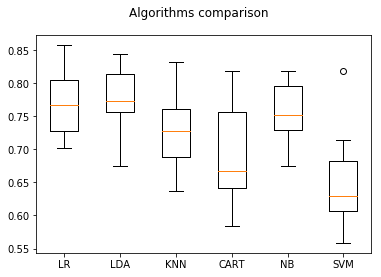

In [5]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithms comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The example also provides a box and whisker plot showing the spread of the accuracy scores across each cross-validation fold for each algorithm. From these results, a suggestion could easily arise: **which models are worthy of further study on this problem?**

## Summary

What we did:

* we discovered how to evaluate multiple different ML algorithms on a dataset in Python with scikit-learn. You learned how to both use the same test harness to evaluate the algorithms and how to summarize the results both numerically and using a box and whisker plot. You can use this recipe as a template for evaluating multiple algorithms on your own problems.